# Analyzing Sea Surface Parameters with RADWave

## Introduction
This Jupyter Notebook utilizes the **RADWave** library to access and analyze altimeter data, enabling the determination of key sea surface parameters such as wave heights, periods, group velocities, energy densities, and energy fluxes. RADWave leverages the **Australian Ocean Data Network (AODN)** database, providing access to a comprehensive altimeter dataset spanning from 1985 to the present. This data, already calibrated and validated by **Ribal (2019)**, ensures reliable information for analyzing wave dynamics over various spatial and temporal scales.

## Objectives
1. **Data Access:** Retrieve satellite-based altimeter data from web-enabled data services (THREDDS) provided through AODN. We will specify a geographic region and time range to target relevant wave data.
2. **Data Visualisation:** Create visualizations of the accessed wave data, highlighting parameters like significant wave height, average wave energy densities, and wave energy flux.

## RADWave Overview
RADWave is a Python package that simplifies access to altimeter data for studying wave dynamics. By connecting to the AODN database, RADWave allows for flexible querying of wave parameters across multiple scales, making it suitable for regional and long-term wave climate analysis. This notebook will showcase RADWave's functionality to download, process, and visualize sea surface parameters derived from satellite data, enabling insights into ocean wave energy and power.


for details: [Radwave read the docs]( https://radwave.readthedocs.io/en/latest/)

https://radwave.readthedocs.io/en/latest/method.html#satellite-altimeter-data

In [2]:
import math 
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sys
import RADWave as rwave

## Step 1: Loading RADWave library and initialisation
We first start by importing RADwave library into our working space.

In [4]:
#OTI extent - data is close to OTI as possible, focussed on the east (exposed) side
boxextent = [152.1,156,-25,-22]

wa = rwave.waveAnalysis(altimeterURL='data/radwave_URLs.txt', bbox=boxextent, 
                  stime=[1985,1,1], etime=[2024,1,1])

Processing Alitmeter Data

In [6]:
wa.processAltimeterData(altimeter_pick='all', saveCSV = 'data/altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-3     / number of tracks                               4   
   +  name SARAL       / number of tracks                               4   
   +  name SENTINEL-3A / number of tracks                               4   
   +  name SENTINEL-3B / number of tracks                               4   
   +  name CRYOSAT-2   / number of tracks                               4   
 
Processing altimeter dataset took:  2 s


In [10]:
wa.readAltimeterData(saveCSV = 'data/altimeterData.csv')

Reading Processed Altimeter Dataset 



Visualise

<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errn

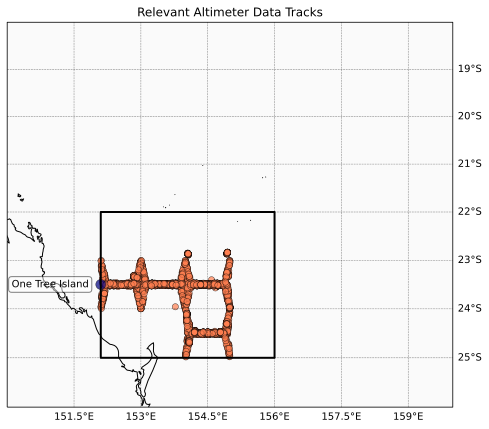

Figure saved:  altimeterdata


In [13]:
mapextent = [160, 150, -26, -18]

wa.visualiseData(title="Relevant Altimeter Data Tracks", extent=mapextent, 
                 addcity=['One Tree Island', 152.1, -23.5], markersize=40, zoom=8,
                 fsize=(8, 7), fsave='altimeterdata')

## Computing wave regime for specified location

To perform wave analysis and compute the wave parameters discussed in the documentation, we run the generateTimeSeries function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both instantaneous and monthly wave variables:

significant wave height (m) - wh & wh_rolling
wave period (s) - period & period_rolling
wave energy flux (kW/m) - power & power_rolling
wave average energy density (J/m2) - energy & energy_rolling
wave group velocity (m/s) - speed & speed_rolling

In [18]:
timeseries = wa.generateTimeSeries()
timeseries

,date,wh,wh_rolling,period,period_rolling,power,power_rolling,energy,energy_rolling,speed,speed_rolling,lat,lon,day,month,year
0,2010-07-29 02:07:21.824221,2.2620,2.262000,5.885836,5.885836,59.059361,59.059361,6428.945663,6428.945663,9.186477,9.186477,-23.496807,154.48859,29,7,2010
1,2010-07-29 02:07:38.334959,2.3720,2.317000,5.902864,5.894350,65.130974,62.095168,7069.423457,6749.184560,9.213053,9.199765,-24.498692,154.37720,29,7,2010
2,2010-07-31 02:04:55.648440,1.2920,1.975333,5.578005,5.788902,18.259937,47.483424,2097.391875,5198.586998,8.706021,9.035184,-23.496553,153.61380,31,7,2010
3,2010-08-02 02:02:29.493162,1.7240,1.912500,4.886301,5.563252,28.480668,42.732735,3734.471310,4832.558076,7.626426,8.682994,-23.498207,152.73857,2,8,2010
4,2010-08-25 00:45:10.103023,1.6400,1.858000,5.459319,5.542465,28.795299,39.945248,3379.421035,4541.930668,8.520779,8.650551,-24.719837,154.97142,25,8,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,2023-12-30 07:17:58.695312,1.4545,1.488272,4.804172,5.546654,19.931567,31.990120,2658.165793,3463.886041,7.498241,8.657089,-24.597021,154.88942,30,12,2023
5398,2023-12-30 11:08:32.597656,0.8630,1.477491,5.663776,5.548673,8.272238,31.581191,935.785229,3420.298096,8.839890,8.660241,-23.108873,154.98718,30,12,2023
5399,2023-12-30 23:32:09.999996,1.0020,1.473132,5.741069,5.579970,11.303779,31.722721,1261.508217,3420.156871,8.960528,8.709088,-23.527970,153.23758,30,12,2023
5400,2023-12-31 11:56:07.499999,0.9500,1.464112,5.468302,5.578045,9.678212,31.342644,1133.970640,3380.739867,8.534799,8.706083,-24.308470,154.92847,31,12,2023


# Step 2: Data visualisation

plot the time series, here we use RADwaves inbuilt plotting functions

Max wave height: 24.949 m
Mean wave height: 1.754 m
Median wave height: 1.576 m
95th percentile wave height: 3.146 m


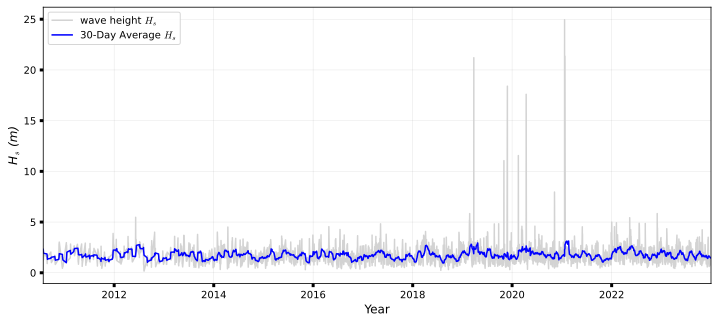

Figure saved:  seriesH


In [21]:
# Significant wave height
wa.plotTimeSeries(time=[0,2024],series='H', fsize=(12, 5), fsave='seriesH')

Max wave period: 30.271 s
Mean wave period: 5.760 s
Median wave period: 5.649 s
95th percentile wave period: 7.250 s


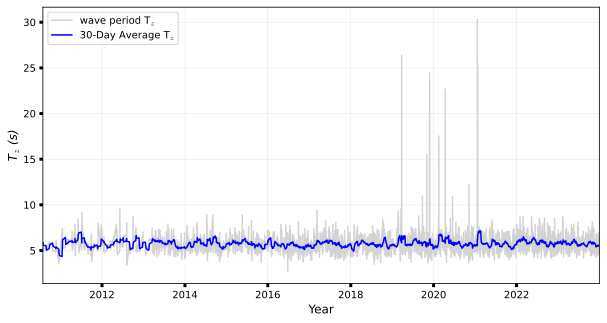

Max wave power: 36950.647 kW/m
Mean wave power: 74.126 kW/m
Median wave power: 27.508 kW/m
95th percentile wave power: 128.440 kW/m


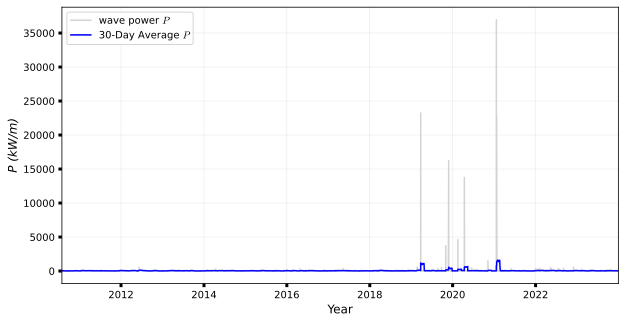

Max wave energy: 782097.459 J/m2
Mean wave energy: 5266.284 J/m2
Median wave energy: 3118.828 J/m2
95th percentile wave energy: 12435.356 J/m2


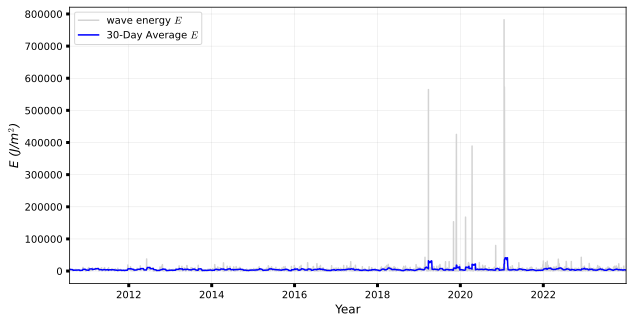

Max wave celerity: 47.246 m/s
Mean wave celerity: 8.989 m/s
Median wave celerity: 8.816 m/s
95th percentile wave celerity: 11.316 m/s


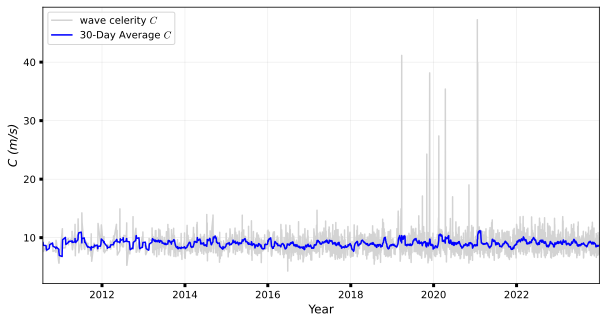

In [23]:
start = 0 
end = 2024

# Wave period
wa.plotTimeSeries(time=[start,end],series='T', fsize=(10, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[start,end],series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[start,end],series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[start,end], series='Cg', fsize=(10, 5), fsave=None)
